In [1]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
TITLE = 'resnet18-unet-300s-base'

In [3]:
with open(os.path.join('..', 'experiments', TITLE, 'config.json')) as f:
    config = json.load(f)
    
config

FileNotFoundError: [Errno 2] No such file or directory: '..\\experiments\\resnet18-unet-300s-base\\config.json'

In [ ]:
train_logs = pd.read_csv(os.path.join('..', 'experiments', TITLE, 'train-log.csv'))
valid_logs = pd.read_csv(os.path.join('..', 'experiments', TITLE, 'valid-log.csv'))

train_logs.head()

In [ ]:
experiments = [f'resnet18-unet-1600s-aug-{i}px' for i in range(3, 14)] + ['resnet18-unet-1600s-aug-30px']
colors = ['g', 'b', 'y', 'pink', 'r']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[1].plot(0, 0, color='black', linestyle='dashed')
ax[1].plot(0, 0, color='black')

for experiment, color in zip(experiments, colors):
    
    train_logs = pd.read_csv(os.path.join('..', 'experiments', experiment, 'train-log.csv'))
    valid_logs = pd.read_csv(os.path.join('..', 'experiments', experiment, 'valid-log.csv'))

    ax[0].plot(train_logs['epoch'], train_logs['dice_loss'], color=color, linestyle='dashed', label='_nolegend_')
    ax[1].plot(train_logs['epoch'], train_logs['positive_iou'], color=color, linestyle='dashed', label='_nolegend_')

    ax[0].plot(valid_logs['epoch'], valid_logs['dice_loss'], color=color)
    ax[1].plot(valid_logs['epoch'], valid_logs['positive_iou'], color=color)

ax[0].set_title('Dice Loss')
ax[1].set_title('Intersection over Union')

ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')

ax[0].set_ylabel('Dice Loss')
ax[1].set_ylabel('Intersection over Union')

plt.legend(['fq-train', 'fq-valid'] + experiments, 
           bbox_to_anchor=(1,-.5), loc="lower right",ncol=2)

plt.tight_layout()

In [ ]:
TITLE = 'effnetb0-unet-300s-aug'

train_logs = pd.read_csv(os.path.join('..', 'experiments', TITLE, 'train-log.csv'))
valid_logs = pd.read_csv(os.path.join('..', 'experiments', TITLE, 'valid-log.csv'))

train_logs.head()

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].plot(train_logs['epoch'], train_logs['true_positive_rate'])
ax[1].plot(train_logs['epoch'], train_logs['true_negative_rate'])
ax[2].plot(train_logs['epoch'], train_logs['false_positive_rate'])
ax[3].plot(train_logs['epoch'], train_logs['false_negative_rate'])

ax[0].plot(train_logs['epoch'], valid_logs['true_positive_rate'])
ax[1].plot(train_logs['epoch'], valid_logs['true_negative_rate'])
ax[2].plot(train_logs['epoch'], valid_logs['false_positive_rate'])
ax[3].plot(train_logs['epoch'], valid_logs['false_negative_rate'])

ax[0].set_title('TPR')
ax[1].set_title('TNR')
ax[2].set_title('FPR')
ax[3].set_title('FNR')

plt.legend(['fq-train', 'fq-valid'])

plt.tight_layout()

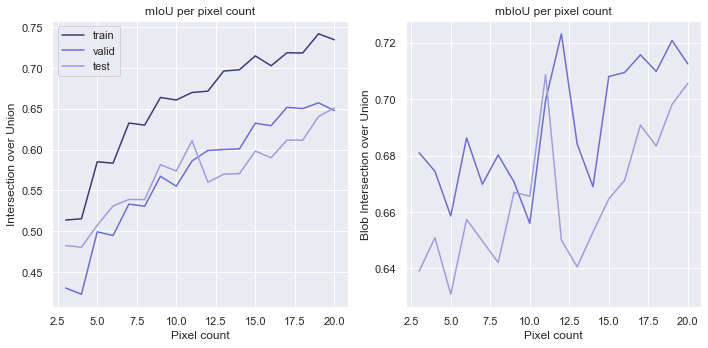

In [25]:
colors = plt.get_cmap('tab20b').colors

experiments = [f'resnet18-unet-1600s-aug-{i}px' for i in range(3, 21)]
x = [i for i in range(3, 21)]

experiments_2 = [f'resnet18-unet-1600s-aug-{i}px' for i in range(30, 60, 10)]
x_2 = [30, 40, 50]

max_train_iou, max_valid_iou = [], []
max_train_biou, max_valid_biou = [], []

for experiment in experiments:
    train_logs = pd.read_csv(os.path.join('..', 'experiments', experiment, 'train-log.csv'))
    valid_logs = pd.read_csv(os.path.join('..', 'experiments', experiment, 'valid-log.csv'))
    
    max_train_iou.append(train_logs.positive_iou.max())
    max_valid_iou.append(valid_logs.positive_iou.max())
    
    max_valid_biou.append(valid_logs.blob_iou.iloc[valid_logs.positive_iou.argmax()])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(x, max_train_iou, c=colors[0])
ax[0].plot(x, max_valid_iou, c=colors[2])

ax[1].plot(x, max_valid_biou, c=colors[2])

df = pd.read_csv(os.path.join('..', 'data', 'test-pxs-results.csv'))

ax[0].plot(x, df.positive_iou.iloc[:-3], c=colors[3])
ax[1].plot(x, df.blob_iou.iloc[:-3], c=colors[3])

ax[0].set_title('mIoU per pixel count')
ax[1].set_title('mbIoU per pixel count')

ax[0].set_xlabel('Pixel count')
ax[1].set_xlabel('Pixel count')

ax[0].set_ylabel('Intersection over Union')
ax[1].set_ylabel('Blob Intersection over Union')

ax[0].legend(['train', 'valid', 'test'])

plt.tight_layout()